# Churn Predication

Churn is defined as movement of customer from one company to other.

Possible reasons might include:
    - Avaibility of latest tech in other company
    - Low Intrest Rates
    - Location
    - Services offered

Churn rate usually lies in range of 10 to 30 percent

This model predicts customers who are likely to churn, using details of former churns 

Churn Prediction is an important aspect for bank as attracting new customers is far more expensive for them than to hold existing customers, in addition loosing old customers leads bank towards loss in profit.

### Hypothesis
    > Younger customers are most likely to churn
    > Customers with medium net worth category are most likely to churn
    > Customer has decreasing number of transactions over specific period of time. 
    > Decrease in account balance over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading dataset
data = pd.read_csv('churn_prediction.csv')
data.shape

(28382, 21)

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [5]:
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [6]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

## Univariate Analysis

### Demographic Info

#### Continous Variables 

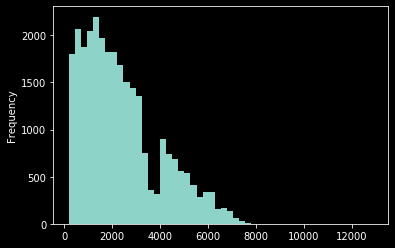

In [7]:
data['vintage'].plot.hist(bins = 50)

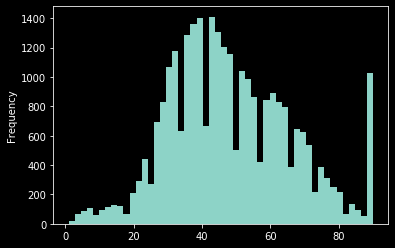

In [8]:
data['age'].plot.hist(bins = 50)

In [9]:
data['dependents'].value_counts()#plot.hist(bins = 100)

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
36.0        1
52.0        1
25.0        1
9.0         1
50.0        1
32.0        1
8.0         1
Name: dependents, dtype: int64

#### Categorical Variables

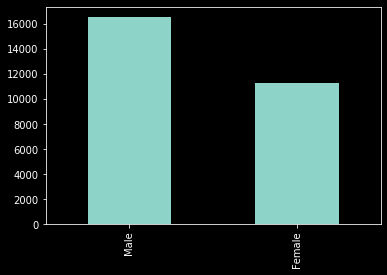

In [10]:
data['gender'].value_counts().plot.bar()

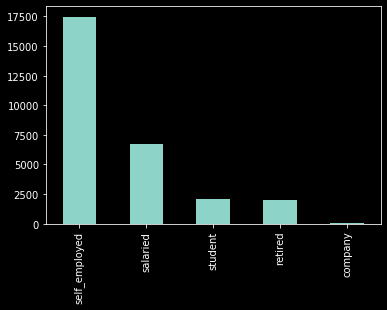

In [11]:
data['occupation'].value_counts().plot.bar()

### Customer Bank Relationship

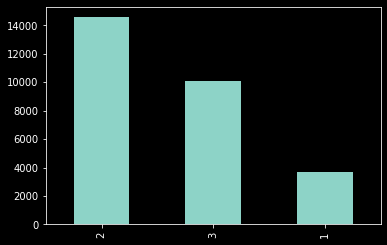

In [12]:
data['customer_nw_category'].value_counts().plot.bar()

Most of the customers lie in medium net worth category, followed by high and low respectively

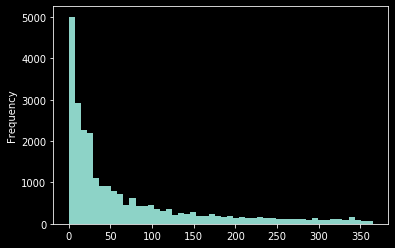

In [13]:
data['days_since_last_transaction'].plot.hist(bins = 50)

### Transactional Info

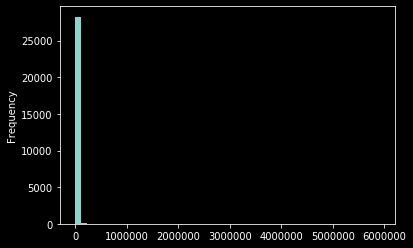

In [14]:
data['current_balance'].plot.hist(bins = 50 )

In [15]:
data['current_balance'].value_counts()

1429.07     6
1428.73     5
1429.14     4
1428.79     4
1428.94     4
           ..
970.41      1
7707.93     1
10931.00    1
6091.23     1
7.50        1
Name: current_balance, Length: 27903, dtype: int64

In [16]:
data['previous_month_end_balance'].value_counts()

1428.73    5
1428.83    5
1429.14    4
2188.61    3
1428.79    3
          ..
3244.25    1
2270.64    1
6050.72    1
6812.94    1
4823.96    1
Name: previous_month_end_balance, Length: 27922, dtype: int64

In [17]:
data['average_monthly_balance_prevQ'].value_counts()

1757.15     3
1837.71     3
1471.93     3
3562.44     3
1451.07     3
           ..
1887.07     1
6102.12     1
2930.91     1
2561.79     1
24309.78    1
Name: average_monthly_balance_prevQ, Length: 27801, dtype: int64

In [18]:
data['churn'].value_counts()*100/len(data['churn'])

0    81.467127
1    18.532873
Name: churn, dtype: float64

churn rate : 18%+

## Bivariate Analysis

In [19]:
data.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


### Relationship between age and churn

In [20]:
data.groupby('churn')['age'].mean()#.plot.bar()

churn
0    48.378298
1    47.461217
Name: age, dtype: float64

In [21]:
pd.crosstab(data['churn'], data['customer_nw_category'])

customer_nw_category,1,2,3
churn,,,
0,3001,11953,8168
1,710,2606,1944


### Relationship between 'days since last transaction' and 'churn'

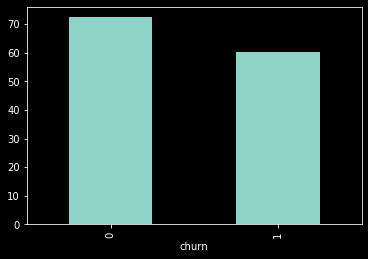

In [22]:
data.groupby('churn')['days_since_last_transaction'].mean().plot.bar()

### Reltionship between difference in current and previous month balance and churn

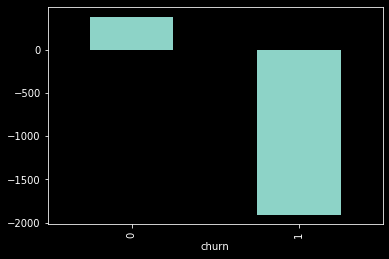

In [23]:
df = data
df['balance_diff'] = df['current_month_balance']-df['previous_month_balance']
df.groupby('churn')['balance_diff'].mean().plot.bar()

### Reltionship between difference in average current and previous month balance and churn

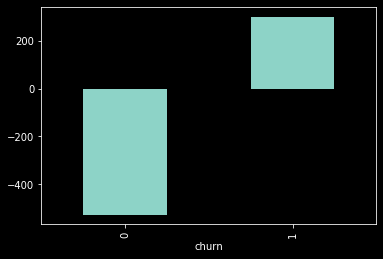

In [24]:
df['diff_avg_balance'] = df['average_monthly_balance_prevQ2'] - df['average_monthly_balance_prevQ'] 
df.groupby('churn')['diff_avg_balance'].mean().plot.bar()

In [25]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
balance_diff                         0
diff_avg_balance                     0
dtype: int64